In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pylab as plt

In [2]:
extract_folder = "dataset/"

In [3]:
train_dir = extract_folder + "archive/training_set/training_set"
valid_dir = extract_folder + "archive/test_set/test_set"

print(train_dir)
print(valid_dir)

dataset/archive/training_set/training_set
dataset/archive/test_set/test_set


In [4]:
image_gen = ImageDataGenerator(rescale=(1/255.))
image_gen
# 픽셀 값을 0~1 사이로 정규화 

In [5]:
# image_gen.flow_from_dirctory 함수
# -> 폴더에서 이미지를 가져와서 제너레이터 객체를 만든다 

train_gen = image_gen.flow_from_directory(train_dir,
                                         batch_size=32,
                                         target_size=(224,224),
                                         classes=['cats','dogs'], # 클래스 레이블(폴더로 구분되어 있음)
                                         class_mode='binary', # 이진 분류 문제 
                                         seed= 2020 )
# train_dir 경로에서, 32장씩 모아서 배치를 구성하고, 사이즈를 224,224로 리사이징 한다


valid_gen = image_gen.flow_from_directory(valid_dir,
                                         batch_size=32,
                                         target_size=(224,224),
                                         classes=['cats','dogs'],
                                         class_mode='binary',
                                         seed = 2020 )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


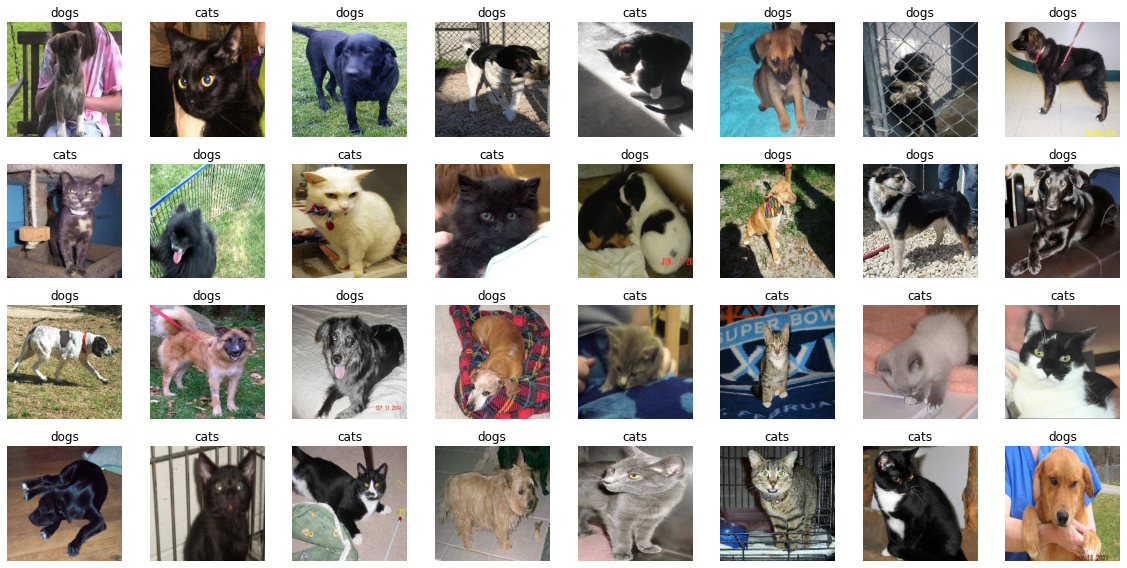

In [6]:
class_labels = ['cats','dogs']
batch = next(train_gen)
images,labels = batch[0], batch[1]

plt.figure(figsize=(16,8))
for i in range(32):
    
    ax = plt.subplot(4,8, i+1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(int)])
    plt.axis("off")
        
plt.tight_layout()
plt.show()


In [7]:
def build_model():
    
    model = tf.keras.Sequential([
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128,(3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),


    ])

    return model

model = build_model()

In [8]:
model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_gen,validation_data=valid_gen,epochs=20)

  ...
    to  
  ['...']
Train for 251 steps, validate for 64 steps
Epoch 1/20
251/251 [==============================] - 103s 410ms/step - loss: 0.6935 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 2/20
251/251 [==============================] - 97s 385ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 3/20
251/251 [==============================] - 104s 413ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 4/20
251/251 [==============================] - 112s 445ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 5/20
251/251 [==============================] - 98s 390ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 6/20
251/251 [==============================] - 112s 445ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 7/20
251/251 [==============================] - 112s

In [9]:
def plot_loss_acc(history, epoch): # Loss와 정확도를 출력하는 함수 정의
    
    loss,val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    # loss 손실값과, acc 정확도를 불러옴
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    
    axes[0].plot(range(1,epoch+1),loss,label='Training')
    axes[0].plot(range(1,epoch+1),val_loss,label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title("Loss")
    
    axes[1].plot(range(1,epoch+1),acc,label='Training')
    axes[1].plot(range(1,epoch+1),val_acc,label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title("Accuracy")
    
    plt.show()


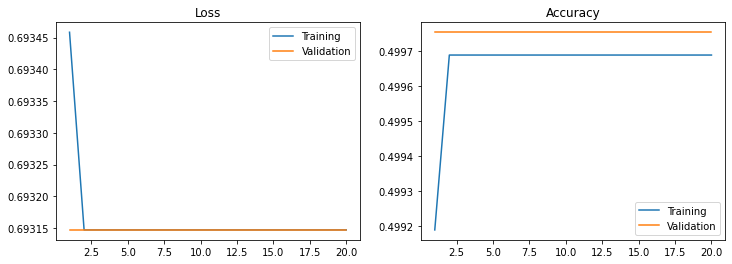

In [10]:
plot_loss_acc(history,20)

In [11]:
image_gen_aug = ImageDataGenerator(rescale=1/255.,
                                   horizontal_flip=True,
                                   rotation_range=30,
                                   shear_range=0.15,
                                   zoom_range=0.3)

train_gen_aug = image_gen_aug.flow_from_directory(train_dir,
                                                  batch_size=32,
                                                  target_size=(224,224),
                                                  classes=['cats','dogs'],
                                                  class_mode='binary',
                                                  seed = 2020)

valid_gen_aug = image_gen_aug.flow_from_directory(valid_dir,
                                                  batch_size=32,
                                                  target_size=(224,224),
                                                  classes=['cats','dogs'],
                                                  class_mode = 'binary',
                                                  seed = 2020)


model_aug = build_model()

model_aug.compile(optimizer = tf.optimizers.Adam(lr=0.001),
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics = ['accuracy'])

history_aug = model_aug.fit(train_gen_aug, validation_data=valid_gen_aug,epochs=40)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
  ...
    to  
  ['...']
Train for 251 steps, validate for 64 steps
Epoch 1/40
251/251 [==============================] - 150s 599ms/step - loss: 0.6936 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 2/40
251/251 [==============================] - 206s 819ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 3/40
251/251 [==============================] - 206s 820ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 4/40
251/251 [==============================] - 206s 820ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 5/40
251/251 [==============================] - 206s 820ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 6/40
251/251 [==============================] - 206s 822ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.

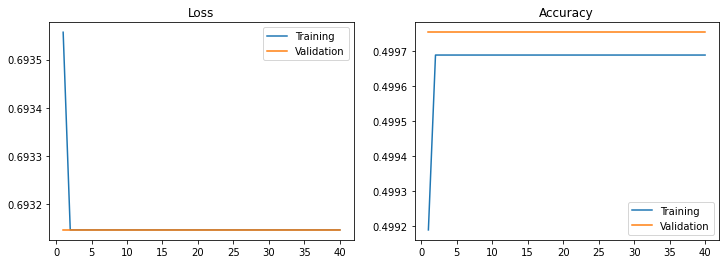

In [13]:
plot_loss_acc(history_aug,40)